# Dependency Parsing HuggingFace

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/dependency-huggingface](https://github.com/huseinzol05/Malaya/tree/master/example/dependency-huggingface).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
import logging

logging.basicConfig(level=logging.INFO)

In [3]:
%%time
import malaya

CPU times: user 3.3 s, sys: 3.22 s, total: 6.51 s
Wall time: 2.36 s


### Describe supported dependencies

In [4]:
malaya.dependency.describe()

INFO:malaya_boilerplate.utils:you can read more from https://universaldependencies.org/treebanks/id_pud/index.html


,Tag,Description
0,acl,clausal modifier of noun
1,advcl,adverbial clause modifier
2,advmod,adverbial modifier
3,amod,adjectival modifier
4,appos,appositional modifier
5,aux,auxiliary
6,case,case marking
7,ccomp,clausal complement
8,compound,compound
9,compound:plur,plural compound


### List available HuggingFace Dependency models

In [5]:
malaya.dependency.available_huggingface()

INFO:malaya.dependency:tested on test set at https://github.com/huseinzol05/malay-dataset/tree/master/parsing/dependency


,Size (MB),Arc Accuracy,Types Accuracy,Root Accuracy
mesolitica/finetune-dependency-t5-tiny-standard-bahasa-cased,61.2,0.84929,0.8281,0.92099
mesolitica/finetune-dependency-t5-small-standard-bahasa-cased,61.2,0.84929,0.8281,0.92099
mesolitica/finetune-dependency-t5-base-standard-bahasa-cased,61.2,0.84929,0.8281,0.92099


### Load HuggingFace dependency model

```python
def huggingface(
    model: str = 'mesolitica/finetune-dependency-t5-small-standard-bahasa-cased',
    force_check: bool = True,
    **kwargs,
):
    """
    Load HuggingFace model to dependency parsing.

    Parameters
    ----------
    model: str, optional (default='mesolitica/finetune-dependency-t5-small-standard-bahasa-cased')
        Check available models at `malaya.dependency.available_huggingface()`.
    force_check: bool, optional (default=True)
        Force check model one of malaya model.
        Set to False if you have your own huggingface model.

    Returns
    -------
    result: malaya.torch_model.huggingface.Dependency
    """
```

In [6]:
model = malaya.dependency.huggingface()

### Predict

```python
def predict(
    self,
    string: str,
    validate_tree: bool = False,
    f_tree: Callable = eisner,
):
    """
    Tag a string. We assumed the string input been properly tokenized.

    Parameters
    ----------
    string: str
    validate_tree: bool, optional (default=False)
        validate arcs is a valid tree using `malaya.parser.conll.CoNLL.istree`.
        Originally from https://github.com/Unipisa/diaparser
    f_tree: Callable, optional (default=malaya.parser.alg.eisner)
        if arcs is not a tree, use approximate function to fix arcs.
        Originally from https://github.com/Unipisa/diaparser

    Returns
    -------
    result: Tuple
    """
```

In [12]:
string = 'Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar sekiranya mengantuk ketika memandu.'

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


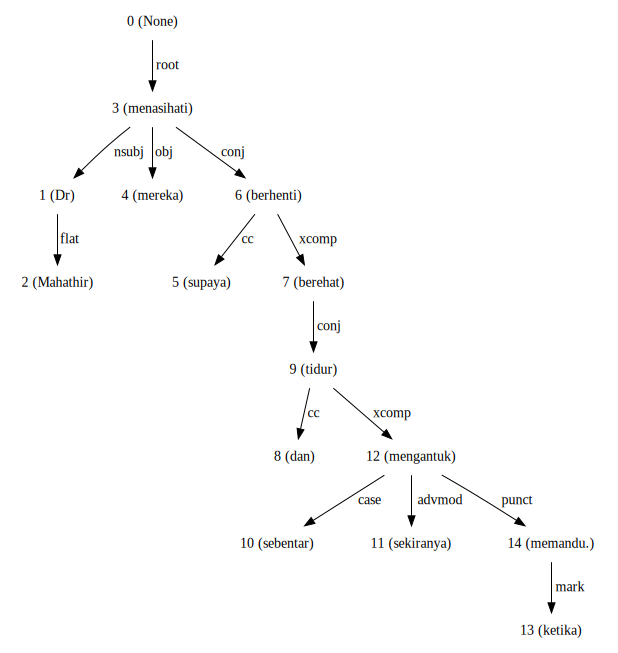

In [14]:
d_object, tagging, indexing = model.predict(string)
d_object.to_graphvis()

### Harder example

In [9]:
# https://www.astroawani.com/berita-malaysia/terbaik-tun-kita-geng-najib-razak-puji-tun-m-297884

s = """
KUALA LUMPUR: Dalam hal politik, jarang sekali untuk melihat dua figura ini - bekas Perdana Menteri, Datuk Seri Najib Razak dan Tun Dr Mahathir Mohamad mempunyai 'pandangan yang sama' atau sekapal. Namun, situasi itu berbeza apabila melibatkan isu ketidakpatuhan terhadap prosedur operasi standard (SOP). Najib, yang juga Ahli Parlimen Pekan memuji sikap Ahli Parlimen Langkawi itu yang mengaku bersalah selepas melanggar SOP kerana tidak mengambil suhu badan ketika masuk ke sebuah surau di Langkawi pada Sabtu lalu.
"""

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


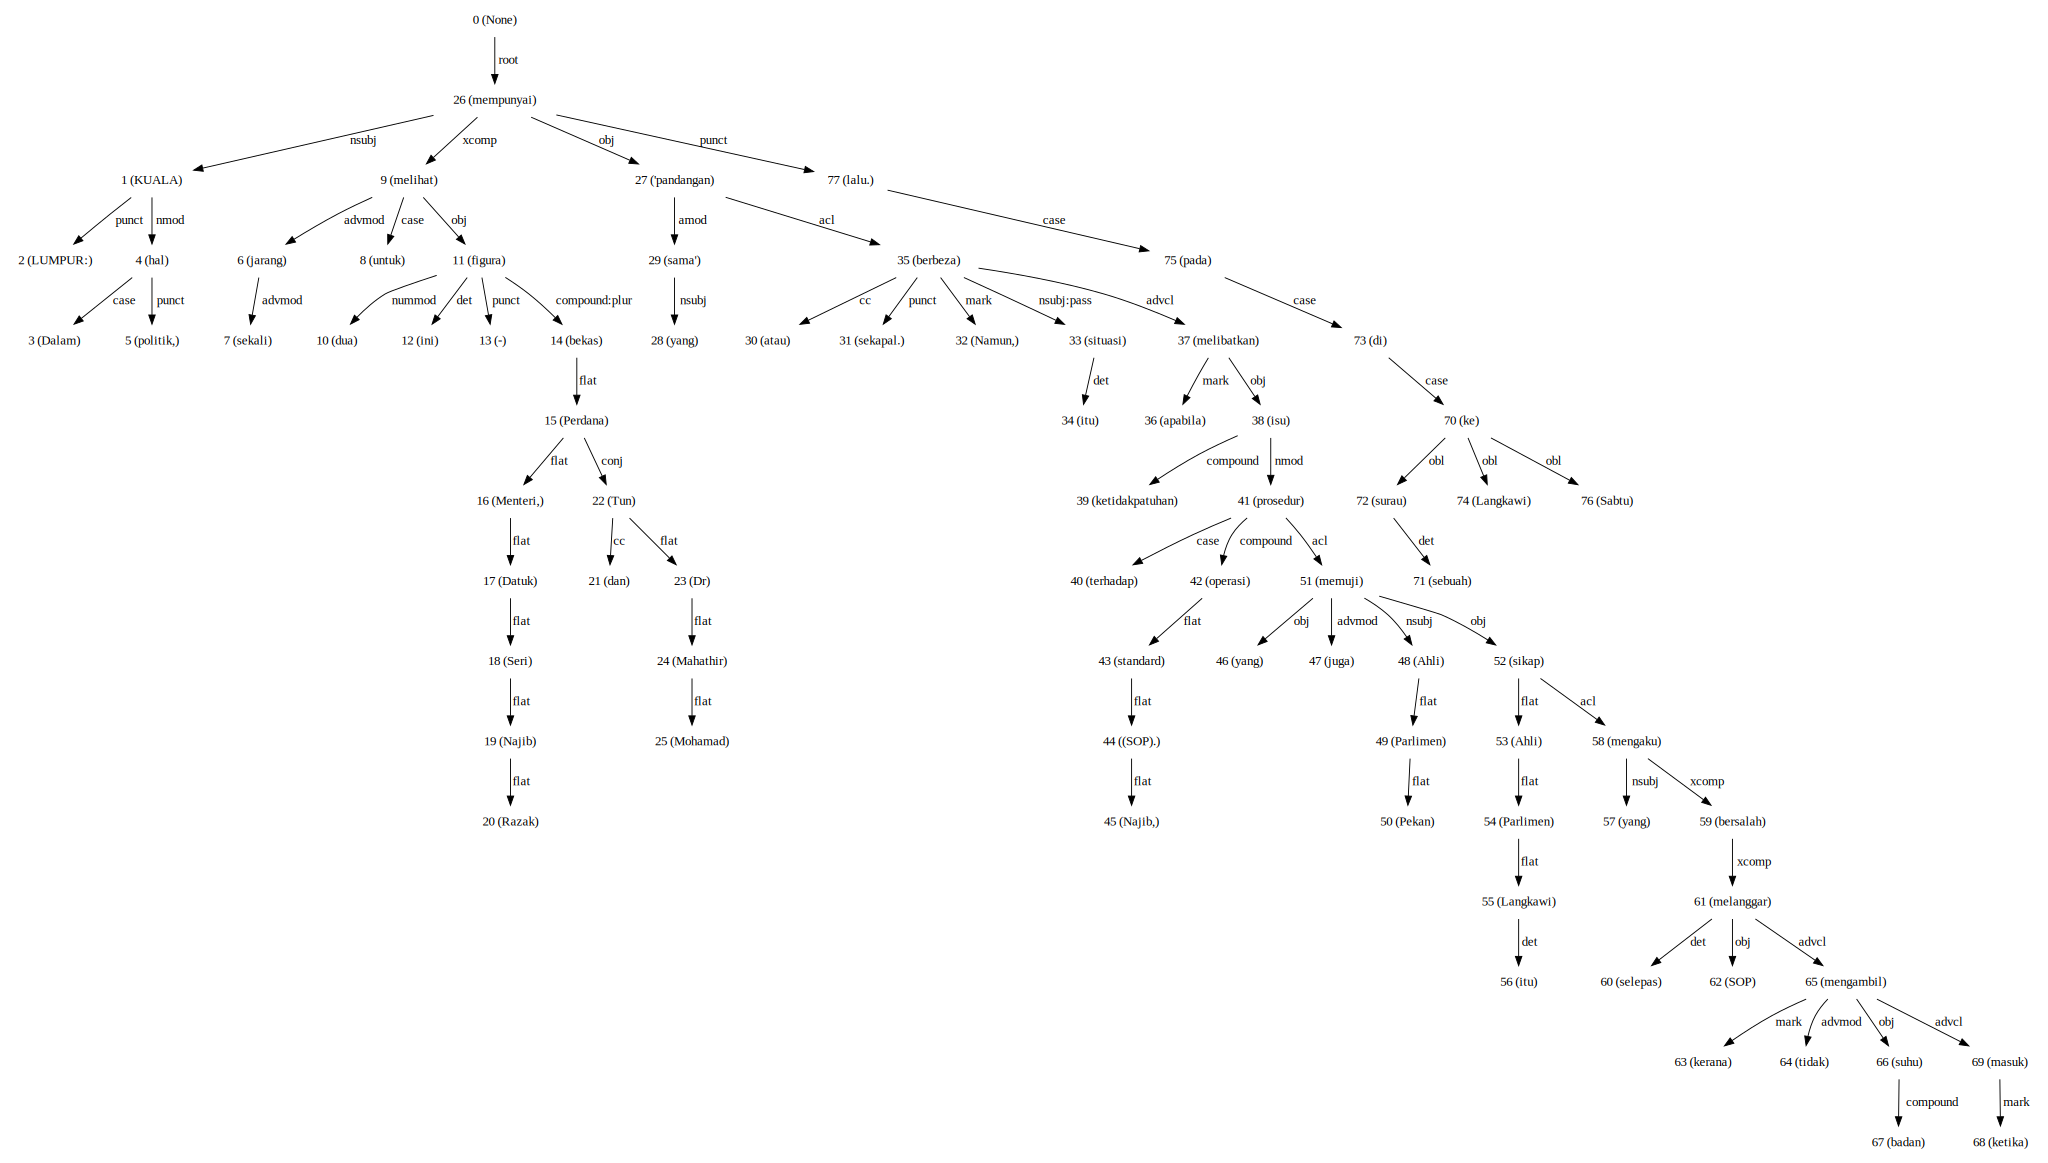

In [10]:
d_object, tagging, indexing = model.predict(s)
d_object.to_graphvis()

### Dependency graph object

To initiate a dependency graph from dependency models, you need to call `malaya.dependency.dependency_graph`.

In [11]:
graph = malaya.dependency.dependency_graph(tagging, indexing)
graph

#### generate graphvis

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


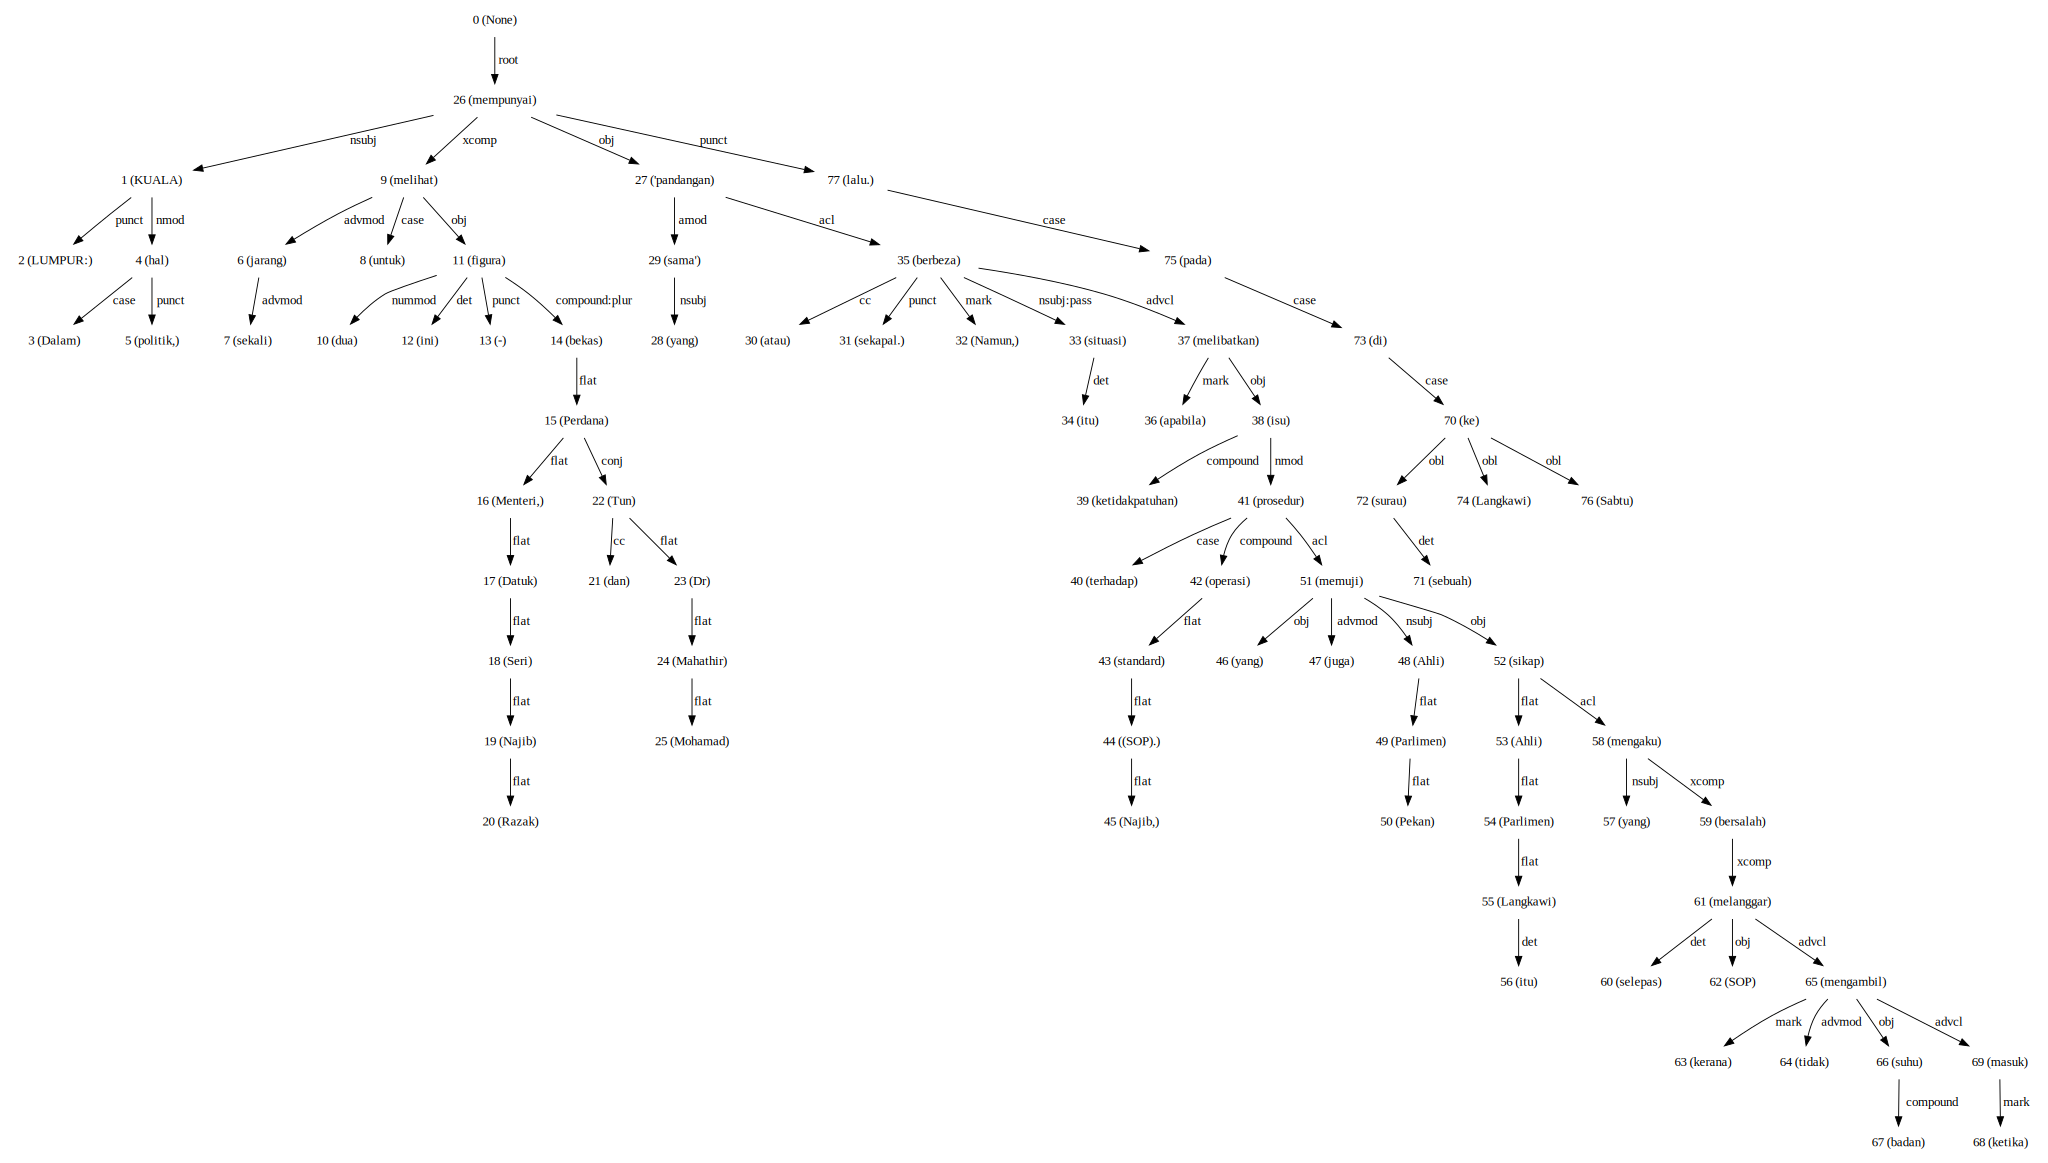

In [12]:
graph.to_graphvis()

#### Get nodes

In [13]:
graph.nodes

defaultdict(<function malaya.function.parse_dependency.DependencyGraph.__init__.<locals>.<lambda>()>,
            {0: {'address': 0,
              'word': None,
              'lemma': None,
              'ctag': 'TOP',
              'tag': 'TOP',
              'feats': None,
              'head': None,
              'deps': defaultdict(list, {'root': [26]}),
              'rel': None},
             1: {'address': 1,
              'word': 'KUALA',
              'lemma': '_',
              'ctag': '_',
              'tag': '_',
              'feats': '_',
              'head': 26,
              'deps': defaultdict(list, {'punct': [2], 'nmod': [4]}),
              'rel': 'nsubj'},
             26: {'address': 26,
              'word': 'mempunyai',
              'lemma': '_',
              'ctag': '_',
              'tag': '_',
              'feats': '_',
              'head': 0,
              'deps': defaultdict(list,
                          {'nsubj': [1],
                           'xc

#### Flat the graph

In [14]:
list(graph.triples())

[(('mempunyai', '_'), 'nsubj', ('KUALA', '_')),
 (('KUALA', '_'), 'punct', ('LUMPUR:', '_')),
 (('KUALA', '_'), 'nmod', ('hal', '_')),
 (('hal', '_'), 'case', ('Dalam', '_')),
 (('hal', '_'), 'punct', ('politik,', '_')),
 (('mempunyai', '_'), 'xcomp', ('melihat', '_')),
 (('melihat', '_'), 'advmod', ('jarang', '_')),
 (('jarang', '_'), 'advmod', ('sekali', '_')),
 (('melihat', '_'), 'case', ('untuk', '_')),
 (('melihat', '_'), 'obj', ('figura', '_')),
 (('figura', '_'), 'nummod', ('dua', '_')),
 (('figura', '_'), 'det', ('ini', '_')),
 (('figura', '_'), 'punct', ('-', '_')),
 (('figura', '_'), 'compound:plur', ('bekas', '_')),
 (('bekas', '_'), 'flat', ('Perdana', '_')),
 (('Perdana', '_'), 'flat', ('Menteri,', '_')),
 (('Menteri,', '_'), 'flat', ('Datuk', '_')),
 (('Datuk', '_'), 'flat', ('Seri', '_')),
 (('Seri', '_'), 'flat', ('Najib', '_')),
 (('Najib', '_'), 'flat', ('Razak', '_')),
 (('Perdana', '_'), 'conj', ('Tun', '_')),
 (('Tun', '_'), 'cc', ('dan', '_')),
 (('Tun', '_'), 'fl

#### Check the graph contains cycles

In [18]:
graph.contains_cycle()

False